In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sb 

In [4]:
dataframe = pd.read_csv('aug_train.csv', decimal = ',', sep = ',', encoding = 'latin1')
dataframe

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.7759999999999999,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


# Analise Exploratoria

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   enrollee_id             19158 non-null  int64 
 1   city                    19158 non-null  object
 2   city_development_index  19158 non-null  object
 3   gender                  14650 non-null  object
 4   relevent_experience     19158 non-null  object
 5   enrolled_university     18772 non-null  object
 6   education_level         18698 non-null  object
 7   major_discipline        16345 non-null  object
 8   experience              19093 non-null  object
 9   company_size            13220 non-null  object
 10  company_type            13018 non-null  object
 11  last_new_job            18735 non-null  object
 12  training_hours          19158 non-null  int64 
 13  target                  19158 non-null  object
dtypes: int64(2), object(12)
memory usage: 2.0+ MB


In [10]:
dataframe_clean = dataframe.dropna()

In [16]:
dataframe_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8955 entries, 1 to 19155
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   enrollee_id             8955 non-null   int64 
 1   city                    8955 non-null   object
 2   city_development_index  8955 non-null   object
 3   gender                  8955 non-null   object
 4   relevent_experience     8955 non-null   object
 5   enrolled_university     8955 non-null   object
 6   education_level         8955 non-null   object
 7   major_discipline        8955 non-null   object
 8   experience              8955 non-null   object
 9   company_size            8955 non-null   object
 10  company_type            8955 non-null   object
 11  last_new_job            8955 non-null   object
 12  training_hours          8955 non-null   int64 
 13  target                  8955 non-null   object
dtypes: int64(2), object(12)
memory usage: 1.3+ MB


In [12]:
dataframe_clean.gender.value_counts()

Male      8073
Female     804
Other       78
Name: gender, dtype: int64

In [14]:
dataframe_clean.relevent_experience.value_counts()

Has relevent experience    7851
No relevent experience     1104
Name: relevent_experience, dtype: int64

In [17]:
dataframe_clean.enrolled_university.value_counts()

no_enrollment       7594
Full time course     832
Part time course     529
Name: enrolled_university, dtype: int64

In [18]:
dataframe_clean.education_level.value_counts()

Graduate    6252
Masters     2449
Phd          254
Name: education_level, dtype: int64

In [19]:
dataframe_clean.major_discipline.value_counts()

STEM               7989
Humanities          378
Other               177
Business Degree     170
Arts                129
No Major            112
Name: major_discipline, dtype: int64

In [20]:
dataframe_clean.experience.value_counts()

>20    1881
5       575
10      551
6       535
9       533
7       485
4       480
3       428
8       398
15      398
11      372
14      333
16      304
2       297
12      293
13      235
17      206
19      179
18      168
1       121
<1       97
20       86
Name: experience, dtype: int64

In [21]:
dataframe_clean.company_size.value_counts()

50-99        1986
100-500      1814
10000+       1449
10/49         951
1000-4999     930
<10           840
500-999       592
5000-9999     393
Name: company_size, dtype: int64

In [22]:
dataframe_clean.company_type.value_counts()

Pvt Ltd                6794
Funded Startup          784
Public Sector           564
Early Stage Startup     385
NGO                     356
Other                    72
Name: company_type, dtype: int64

In [24]:
dataframe_clean.last_new_job.value_counts()

1        3838
>4       1965
2        1570
3         610
4         599
never     373
Name: last_new_job, dtype: int64

In [130]:
dataframe_clean.target.value_counts()

0.0    7472
1.0    1483
Name: target, dtype: int64

In [29]:
dataframe_clean.drop(columns = ['enrollee_id', 'city'], inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [36]:
dataframe_gd = pd.get_dummies(dataframe_clean, columns = ['gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job'])
dataframe_gd

,city_development_index,training_hours,target,gender_Female,gender_Male,gender_Other,relevent_experience_Has relevent experience,relevent_experience_No relevent experience,enrolled_university_Full time course,enrolled_university_Part time course,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
1,0.7759999999999999,47,0.0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0.767,8,0.0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,0.762,18,1.0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
8,0.92,46,1.0,0,1,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
11,0.92,108,0.0,0,1,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19147,0.624,52,1.0,0,1,0,0,1,1,0,...,0,0,0,1,1,0,0,0,0,0
19149,0.92,36,1.0,0,1,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
19150,0.92,23,0.0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
19152,0.92,25,0.0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [48]:
dataframe_gd.city_development_index = dataframe_gd.city_development_index.astype('float')
dataframe_gd.target = dataframe_gd.target.astype('float')

In [50]:
dataframe_gd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8955 entries, 1 to 19155
Data columns (total 62 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   city_development_index                       8955 non-null   float64
 1   training_hours                               8955 non-null   int64  
 2   target                                       8955 non-null   float64
 3   gender_Female                                8955 non-null   uint8  
 4   gender_Male                                  8955 non-null   uint8  
 5   gender_Other                                 8955 non-null   uint8  
 6   relevent_experience_Has relevent experience  8955 non-null   uint8  
 7   relevent_experience_No relevent experience   8955 non-null   uint8  
 8   enrolled_university_Full time course         8955 non-null   uint8  
 9   enrolled_university_Part time course         8955 non-null   uint8  
 10 

# FEATURE ENGINEERING

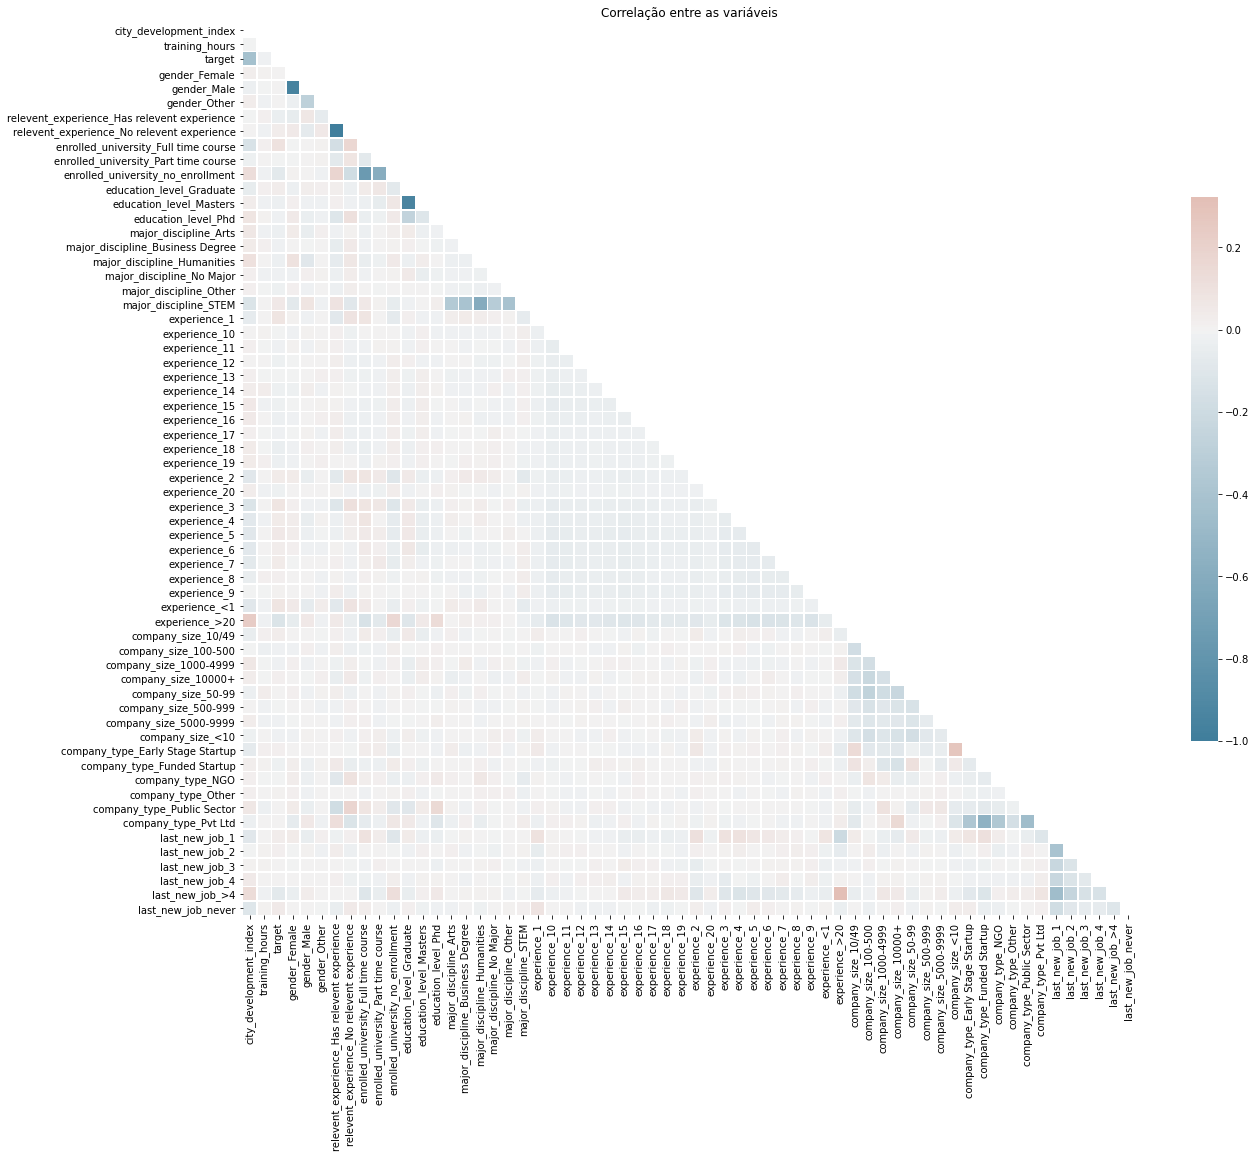

In [56]:
corr = dataframe_gd.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sb.diverging_palette(230, 20, as_cmap=True)
sb.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlação entre as variáveis')
plt.show()

# Undersampling

Class 0: 7472
Class 1: 1483
Proportion: 5.04 : 1


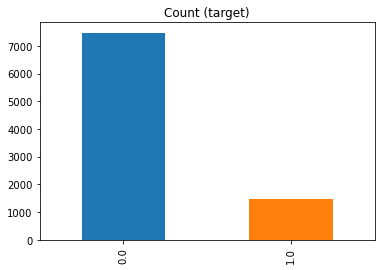

In [131]:
target_count = dataframe_gd['target'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')
target_count.plot(kind='bar', title='Count (target)',color = ['#1F77B4', '#FF7F0E']);

Random under-sampling:
1.0    1483
0.0    1483
Name: target, dtype: int64


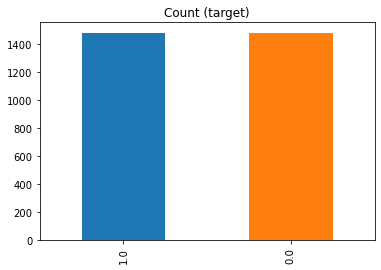

In [132]:
# CONTAR CLASSES
count_class_0, count_class_1 = dataframe_gd['target'].value_counts()
# Divide by class
df_class_0 = dataframe_gd[dataframe_gd['target'] == 0]
df_class_1 = dataframe_gd[dataframe_gd['target'] == 1]
df_class_0_under = df_class_0.sample(count_class_1)
dataframe_gd = pd.concat([df_class_0_under, df_class_1], axis = 0)
print('Random under-sampling:')
print(dataframe_gd['target'].value_counts())
dataframe_gd['target'].value_counts().plot(kind='bar', title='Count (target)',color = ['#1F77B4', '#FF7F0E']);

In [133]:
features = dataframe_gd.drop(columns=['target'])

In [134]:
target = dataframe_gd['target']

# Modelagem de Classificação - Modelo Linear - LDA

In [143]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [144]:
clf = LinearDiscriminantAnalysis()

In [145]:
clf.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [146]:
predictors = clf.predict(x_test)

In [147]:
pd.Series(predictors).value_counts()

0.0    527
1.0    363
dtype: int64

In [148]:
y_test.value_counts()

0.0    445
1.0    445
Name: target, dtype: int64

<AxesSubplot:>

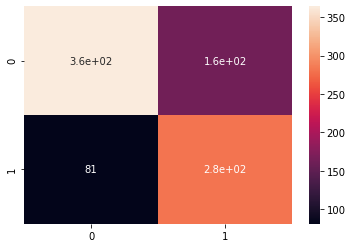

In [149]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(predictors, y_test)
sb.heatmap(cf_matrix, annot=True)

<AxesSubplot:>

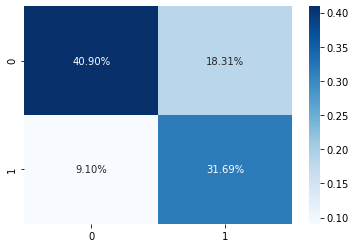

In [150]:
sb.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [165]:
from sklearn.metrics import log_loss, accuracy_score, f1_score, precision_score, recall_score, classification_report

def metricas(y_true, y_pred):
    ac = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    ps = precision_score(y_true, y_pred)
    rc = recall_score(y_true, y_pred)

    score = ['Score', round(ac,4), round(ps,4), round(rc,4), round(f1,4)]

    colunas = ['Métricas', 'Acurácia', 'Precisão', 'Recall', 'F1']
    metrics = pd.DataFrame([score], columns = colunas)
    return metrics

In [166]:
metricas(y_test, predictors)

,Métricas,Acurácia,Precisão,Recall,F1
0,Score,0.7258,0.7769,0.6337,0.698


# Modelagem de Classificação - Modelo Não Linear

In [186]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [187]:
x = dataframe_gd[(i for i in dataframe_gd.columns if i != 'target')]
y = dataframe_gd['target']

kf = KFold(n_splits=5, random_state=1234)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


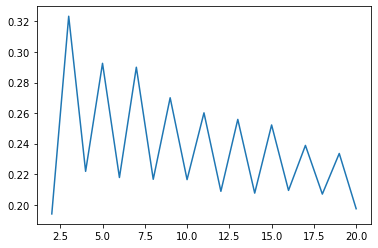

In [189]:
f1_arr = []
for neigh in range(2, 21, 1):
    knn = KNeighborsClassifier(n_neighbors = neigh)
    scores = cross_val_score(knn, x, y, cv = kf, scoring = 'f1')
    f1_arr.append(scores.mean())
plt.plot(range(2, 21, 1), f1_arr)

In [190]:
neigh = KNeighborsClassifier(n_neighbors = 3)
neigh.fit(x_train, y_train)
previsoes = neigh.predict(x_test)

<AxesSubplot:>

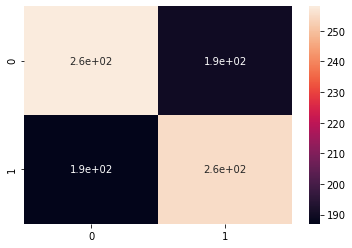

In [191]:
cf_matrix = confusion_matrix(previsoes, y_test)
sb.heatmap(cf_matrix, annot=True)

<AxesSubplot:>

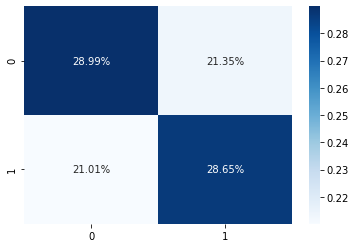

In [192]:
sb.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [194]:
metricas(y_test, previsoes)

,Métricas,Acurácia,Precisão,Recall,F1
0,Score,0.5764,0.5769,0.573,0.575


# SELEÇÃO DE MELHORES FEATURES - RANDOM FOREST

In [228]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, target, 
                                                    test_size = 0.3, 
                                                    random_state = 1234, 
                                                    stratify = target)

In [229]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(x_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [230]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

8

In [231]:
x_new = dataframe_gd[selected_feat]

In [232]:
x_train, x_test, y_train, y_test = train_test_split(x_new, target, 
                                                    test_size = 0.3, 
                                                    random_state = 1234, 
                                                    stratify = target)

In [233]:
clf = LinearDiscriminantAnalysis()
clf.fit(x_train, y_train)
previsoes = clf.predict(x_test)

<AxesSubplot:>

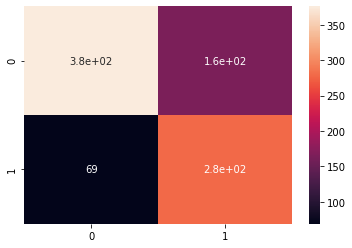

In [234]:
cf_matrix = confusion_matrix(previsoes, y_test)
sb.heatmap(cf_matrix, annot=True)

<AxesSubplot:>

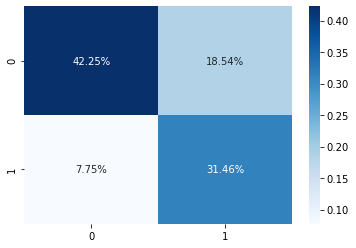

In [235]:
sb.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [236]:
metricas(y_test, previsoes)

,Métricas,Acurácia,Precisão,Recall,F1
0,Score,0.7371,0.8023,0.6292,0.7053


In [237]:
neigh = KNeighborsClassifier(n_neighbors = 3)
neigh.fit(x_train, y_train)
previsoes = neigh.predict(x_test)

<AxesSubplot:>

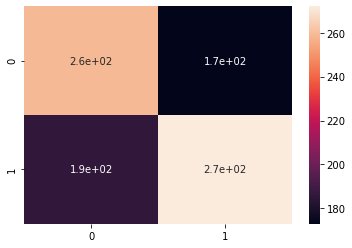

In [238]:
cf_matrix = confusion_matrix(previsoes, y_test)
sb.heatmap(cf_matrix, annot=True)

<AxesSubplot:>

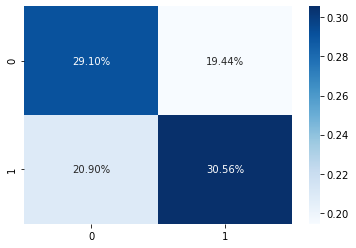

In [239]:
sb.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [240]:
metricas(y_test, previsoes)

,Métricas,Acurácia,Precisão,Recall,F1
0,Score,0.5966,0.5939,0.6112,0.6024
